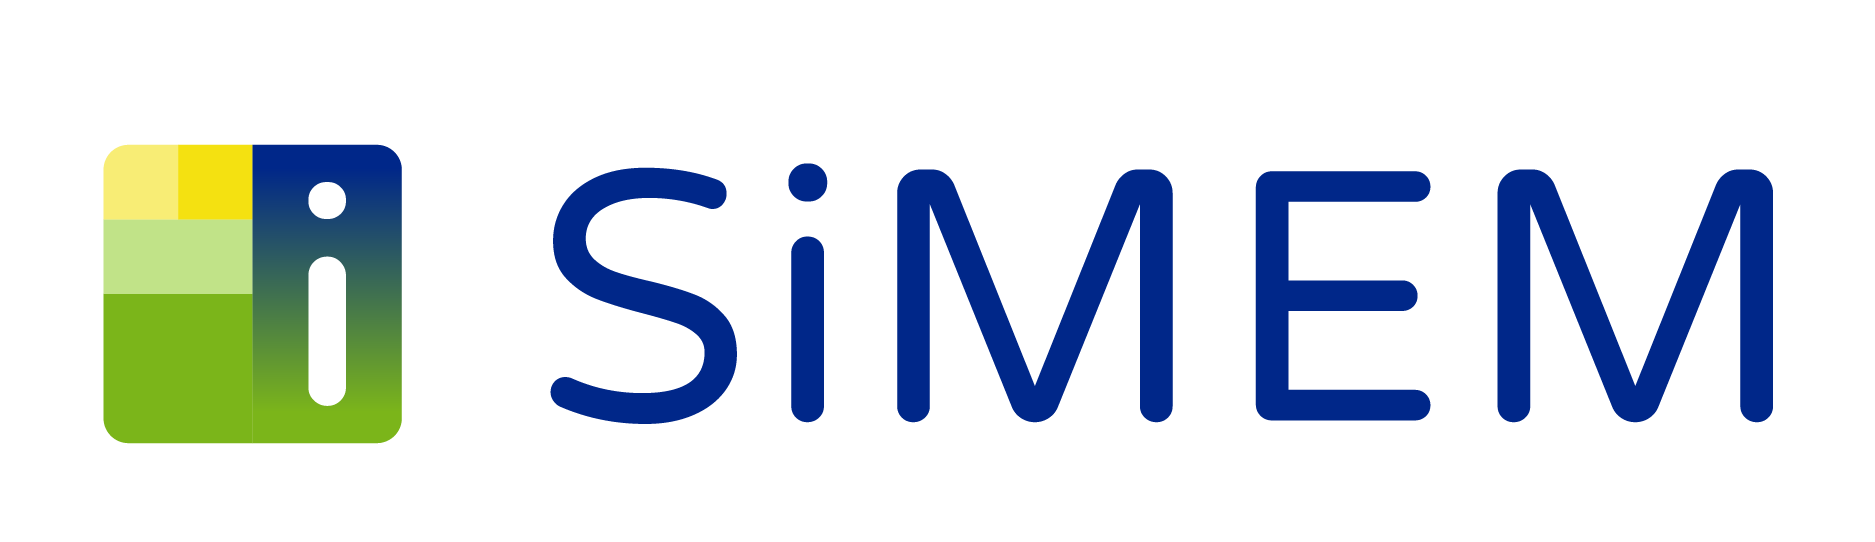

[SiMEM](https://www.simem.co/)

## Caso de uso - Segmentación y clasificación de agentes de acuerdo con su precio y cantidades en contratos de energía del mercado mayorista con destino al mercado regulado


# Objetivos de este notebook

* Explicar cómo se realiza la instalación e importación de la librería pydataxm desde la consola para su uso en ambientes locales
* Explicar cómo se pueden consultar los conjuntos de datos a través de la librería Pydataxm
* Explicar cómo realizar el procesamiento y manipulación de los datos consultados
* Explicar el análisis de los datos consultados para dar respuesta al caso de uso propuesto

**Índice**

1. [Instalación de librerías](#section1)

2. [Importación de librerías](#section2)

3. [Consultar información de los conjuntos de datos](#section3)

4. [Manipulación de datos](#section4)

5. [Análisis para dar respuesta al caso de uso](#section5)


<a id='section1'></a>
# 1. Instalación de la librería
Ejecutar el siguiente comando en el CMD para instalar la librería de python.

In [50]:
# !{sys.executable} -m pip install -U pydataxm

<a id='section2'></a>
# 2. Importación de librerías


In [51]:
import sys                                  # Proporciona acceso a variables y funciones del intérprete de Python
from pydataxm.pydatasimem import ReadSIMEM, VariableSIMEM   # Importa clases para interactuar con datos del sistema SIMEM
import pandas as pd                         # Librería para manipulación y análisis de datos en estructuras tipo DataFrame
import datetime as dt                       # Módulo para trabajar con fechas y horas
from datetime import timedelta              # Importa la clase timedelta para operaciones con diferencias de tiempo

# Importar librerías para visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns

<a id='section3'></a>
# 3. Consultar información de los conjuntos de datos
El método de extracción recibe los parámetros con los que se va a realizar la consulta. 
El datasetID para un conjunto particular se puede encontrar en el [catálogo de conjuntos de datos.](https://www.simem.co/pages/catalogodatos/51FC0A59-3A00-462C-B449-9CB8D5E007FB)  
Para este ejemplo el conjunto a presentar es  [Proyecciones de las cantidades y precios en contratos de energía del Mercado Mayorista por comercializador](https://www.simem.co/datadetail/8d10e6f4-dfe4-409b-bc41-08dd3983a071).

Se definen los parámetros de entrada y se crea el objeto ReadSIMEM() para realizar las consultas.

In [52]:
id_dataset = '8d10e6'                                     # ID del conjunto de datos a consultar
fecha_inicial = '2025-08-01'                              # Fecha de inicio del rango de consulta
fecha_final = '2030-07-31'                                # Fecha de fin del rango de consulta
simem = ReadSIMEM(dataset_id=id_dataset, start_date=fecha_inicial, end_date=fecha_final)   # Instancia de la clase ReadSIMEM con los parámetros definidos
df_dataset = simem.main()                      # Ejecución del método principal para obtener los datos en un DataFrame
df_dataset.head(5)                                     # Visualización de las primeras 5 filas del DataFrame

****************************************************************************************************
Initializing object
The object has been initialized with the dataset: "Proyecciones de las cantidades y precios en contratos de energía del Mercado Mayorista por comercializador"
****************************************************************************************************
Inicio consulta sincronica
Creacion url: 0.0007615089416503906
The object has been initialized with the dataset: "Proyecciones de las cantidades y precios en contratos de energía del Mercado Mayorista por comercializador"
****************************************************************************************************
Inicio consulta sincronica
Creacion url: 0.0007615089416503906
Extraccion de registros: 4.694957733154297
End of data extracting process
****************************************************************************************************
Extraccion de registros: 4.694957733154297
End of data ext

,FechaPublicacion,FechaProyectada,CodigoAgenteComprador,TipoMercado,Mecanismo,Cantidad,PPP
0,2025-04-01,2027-07-01,AMRC,No Regulado,Negociación Bilateral,53116280.0,261.7942
1,2025-04-01,2027-07-01,AMPC,No Regulado,Negociación Bilateral,16615380.0,274.6767
2,2025-04-01,2027-07-01,AESC,No Regulado,Negociación Bilateral,14253998.0,294.6331
3,2025-05-01,2027-07-01,ZONC,No Regulado,Negociación Bilateral,66165568.0,291.6569
4,2025-05-01,2027-07-01,VESC,No Regulado,Negociación Bilateral,200880.0,377.4464


Consulta de listado de agentes para obtener su nombre

In [53]:
id_dataset = '972263'                      # ID del conjunto de datos a consultar
fecha_inicial = '2025-07-31'               # Fecha de inicio del rango de consulta
fecha_final = '2025-07-31'                 # Fecha de fin del rango de consulta
simem = ReadSIMEM(dataset_id=id_dataset, start_date=fecha_inicial, end_date=fecha_final)   # Instancia de la clase ReadSIMEM con los parámetros definidos
df_agentes = simem.main()       # Ejecución del método principal para obtener los datos en un DataFrame
df_agentes.head(5)                       # Visualización de las primeras 5 filas del DataFrame

****************************************************************************************************
Initializing object
The object has been initialized with the dataset: "Listado de agentes registrados"
****************************************************************************************************
Inicio consulta sincronica
Creacion url: 0.00032138824462890625
The object has been initialized with the dataset: "Listado de agentes registrados"
****************************************************************************************************
Inicio consulta sincronica
Creacion url: 0.00032138824462890625
Extraccion de registros: 3.3051929473876953
End of data extracting process
****************************************************************************************************
Extraccion de registros: 3.3051929473876953
End of data extracting process
****************************************************************************************************


,Fecha,CodigoDuracion,CodigoSICAgente,NombreAgente,ActividadAgente
0,2025-07-31,P1D,GASC,GENERARCO S.A.S. E.S.P.,Comercializador
1,2025-07-31,P1D,ESNG,ES INVEST COLOMBIA S.A.S. ESP,Generador
2,2025-07-31,P1D,ABAC,AURES BAJO S.A.S. E.S.P.,Comercializador
3,2025-07-31,P1D,NEUC,NEU ENERGY S.A.S E.S.P,Comercializador
4,2025-07-31,P1D,EGRC,4E GROUP S.A.S E.S.P.,Comercializador


<a id='section4'></a>
# 4. Manipulación de datos
Los siguientes pasos corresponden a las actividades de manipulación y preparación de los datos que son relevantes para el análisis. 

### Filtrar la máxima versión para el periodo de consulta de los datos, es decir, la fecha de publicación mas reciente de las proyecciones

In [54]:
df_trabajo = df_dataset.copy()                            # Copia del DataFrame original para trabajar con él
max_fecha_publicacion = df_trabajo['FechaPublicacion'].max()    # Obtención de la fecha de publicación más reciente
df_trabajo = df_trabajo[df_trabajo['FechaPublicacion'] == max_fecha_publicacion]  # Filtrado de datos por fecha de publicación
df_trabajo.head()

,FechaPublicacion,FechaProyectada,CodigoAgenteComprador,TipoMercado,Mecanismo,Cantidad,PPP
694,2025-08-27,2027-07-01,CSIC,No Regulado,Negociación Bilateral,4.984800e+07,323.2676
695,2025-08-27,2027-07-01,CSIC,Regulado,SICEP,1.950268e+08,294.5161
696,2025-08-27,2027-07-01,EBPC,Regulado,SICEP,6.878332e+06,340.7877
697,2025-08-27,2027-07-01,EBSC,Regulado,Mecanismos de Comercialización,1.012716e+06,137.2611
698,2025-08-27,2027-07-01,EBSC,Regulado,SICEP,5.381994e+07,298.3598


In [55]:
df_trabajo = pd.merge(df_trabajo, df_agentes[['CodigoSICAgente', 'NombreAgente']], how='left', left_on='CodigoAgenteComprador', right_on='CodigoSICAgente', validate='m:1')
df_trabajo.head() # Visualizar el DataFrame con el nombre de los agentes compradores

,FechaPublicacion,FechaProyectada,CodigoAgenteComprador,TipoMercado,Mecanismo,Cantidad,PPP,CodigoSICAgente,NombreAgente
0,2025-08-27,2027-07-01,CSIC,No Regulado,Negociación Bilateral,4.984800e+07,323.2676,CSIC,AIR-E S.A.S. E.S.P.
1,2025-08-27,2027-07-01,CSIC,Regulado,SICEP,1.950268e+08,294.5161,CSIC,AIR-E S.A.S. E.S.P.
2,2025-08-27,2027-07-01,EBPC,Regulado,SICEP,6.878332e+06,340.7877,EBPC,EMPRESA DE ENERGIA DEL BAJO PUTUMAYO S.A. E.S.P.
3,2025-08-27,2027-07-01,EBSC,Regulado,Mecanismos de Comercialización,1.012716e+06,137.2611,EBSC,EMPRESA DE ENERGIA DE BOYACA S.A. E.S.P.
4,2025-08-27,2027-07-01,EBSC,Regulado,SICEP,5.381994e+07,298.3598,EBSC,EMPRESA DE ENERGIA DE BOYACA S.A. E.S.P.


In [56]:
df_trabajo = df_trabajo[df_trabajo['TipoMercado']=='Regulado']  # Filtrado de datos para incluir solo aquellos del tipo 'Regulado'
df_trabajo = df_trabajo[df_trabajo['Cantidad'] > 0]             # Filtrado de datos para incluir solo aquellos con cantidad mayor a cero

<a id='section5'></a>
# 5. Análisis para dar respuesta al caso de uso

### Comportamiento del precio promedio ponderado de contratación para los 5 agentes con mayor y menor cantidad contratada

In [57]:
df_trabajo['Dinero'] = df_trabajo['Cantidad'] * df_trabajo['PPP']

df_ppp = (
    df_trabajo
    .groupby(['NombreAgente', 'FechaProyectada'], as_index=False)
    .agg({'Dinero': 'sum', 'Cantidad': 'sum'})
)

# Calcula el nuevo PPP
df_ppp['PPP'] = df_ppp['Dinero'] / df_ppp['Cantidad']
df_ppp.drop(columns=['Dinero'], inplace=True)
df_ppp.head()

,NombreAgente,FechaProyectada,Cantidad,PPP
0,AIR-E S.A.S. E.S.P.,2025-08-01,407219496.0,325.934952
1,AIR-E S.A.S. E.S.P.,2025-09-01,410689504.0,330.475836
2,AIR-E S.A.S. E.S.P.,2025-10-01,411269336.0,331.907957
3,AIR-E S.A.S. E.S.P.,2025-11-01,402829392.0,332.891774
4,AIR-E S.A.S. E.S.P.,2025-12-01,423967632.0,331.924501


In [58]:
num_agentes = 5
top_agentes = (
    df_trabajo.groupby('CodigoSICAgente')['Cantidad']
    .sum()
    .sort_values(ascending=False)
    .head(num_agentes)
    .index
)

tail_agentes = (
    df_trabajo.groupby('CodigoSICAgente')['Cantidad']
    .sum()
    .sort_values(ascending=True)
    .head(num_agentes)
    .index
)
# Mostrar los nombres de los agentes principales
top_5_nombres = df_agentes[df_agentes['CodigoSICAgente'].isin(top_agentes)]['NombreAgente'].unique().tolist()
tail_5_nombres = df_agentes[df_agentes['CodigoSICAgente'].isin(tail_agentes)]['NombreAgente'].unique().tolist()

print(f"Los {num_agentes} agentes con mayor cantidad contratada en el mercado regulado son: {top_5_nombres}")
print(f"Los {num_agentes} agentes con menor cantidad contratada en el mercado regulado son: {tail_5_nombres}")

Los 5 agentes con mayor cantidad contratada en el mercado regulado son: ['ENEL COLOMBIA SA ESP', 'EMPRESAS PUBLICAS DE MEDELLIN E.S.P.', 'ELECTRIFICADORA DE SANTANDER S.A. E.S.P.', 'CARIBEMAR DE LA COSTA S.A.S. E.S.P.', 'AIR-E S.A.S. E.S.P.']
Los 5 agentes con menor cantidad contratada en el mercado regulado son: ['EMPRESA MUNICIPAL DE SERVICIOS PUBLICOS DE CARTAGENA DEL CHAIRA', 'EMPRESA DE ENERGIA DEL VALLE DE SIBUNDOY S.A. E.S.P.', 'SOL & CIELO ENERGIA S.A.S. E.S.P', 'EMPRESA SIGLO XXI EICE ESP', 'ITALCOL ENERGIA S.A. E.S.P.']


In [59]:
# Filtrar el DataFrame para solo esos agentes
df_top = df_ppp[df_ppp['NombreAgente'].isin(top_5_nombres)]
df_top.loc[:, 'FechaProyectada'] = pd.to_datetime(df_top['FechaProyectada'])

df_tail = df_ppp[df_ppp['NombreAgente'].isin(tail_5_nombres)]
df_tail.loc[:, 'FechaProyectada'] = pd.to_datetime(df_tail['FechaProyectada'])

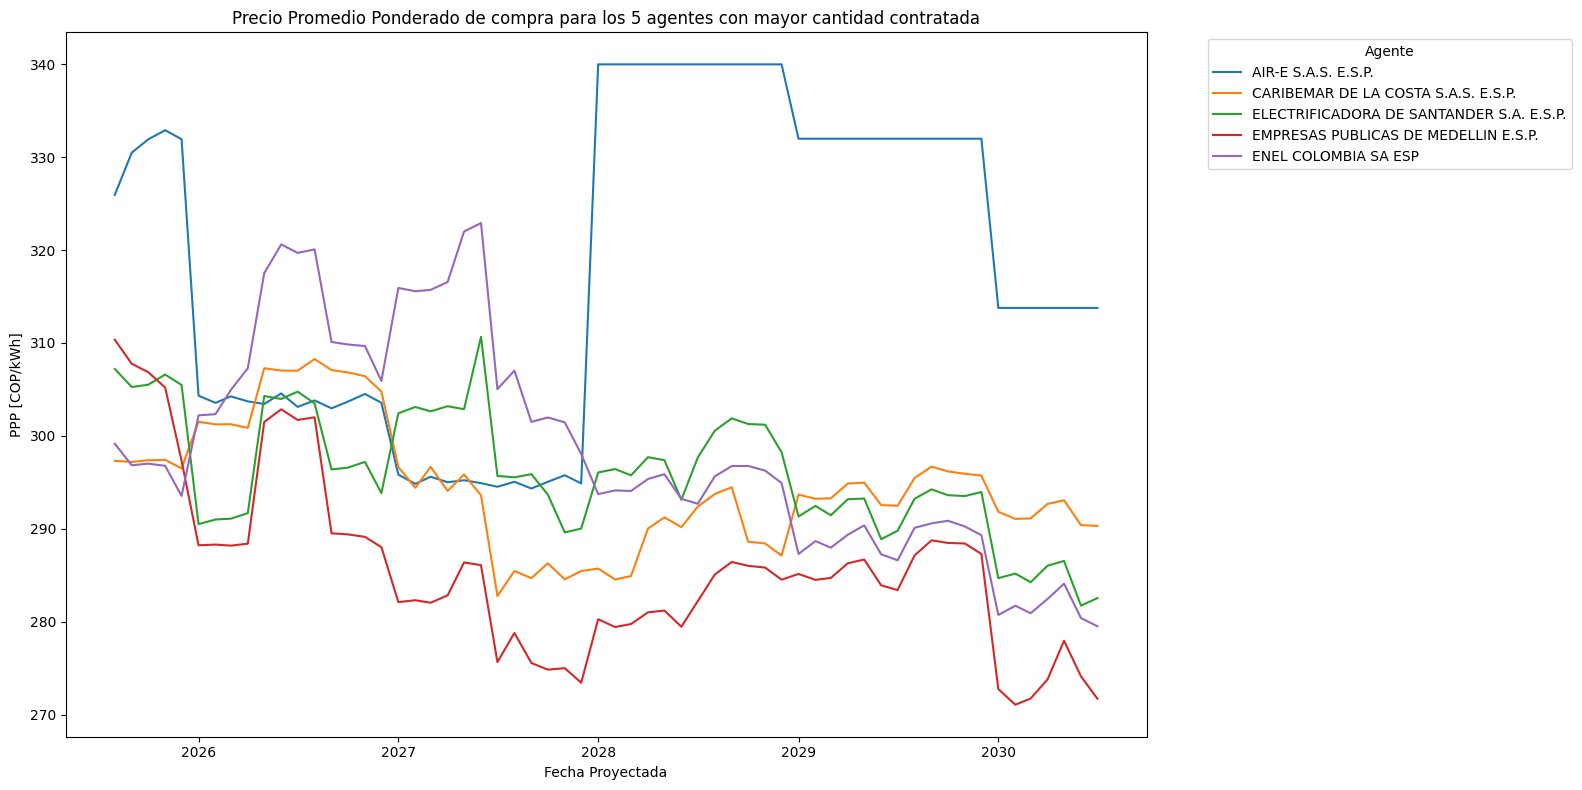

In [60]:
plt.figure(figsize=(16, 8))
sns.lineplot(
    data=df_top,
    x='FechaProyectada',
    y='PPP',
    hue='NombreAgente',
    # marker='o'
)
plt.title(f'Precio Promedio Ponderado de compra para los {num_agentes} agentes con mayor cantidad contratada')
plt.xlabel('Fecha Proyectada')
plt.ylabel('PPP [COP/kWh]')
plt.legend(title='Agente', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=1)
plt.tight_layout()
plt.show()

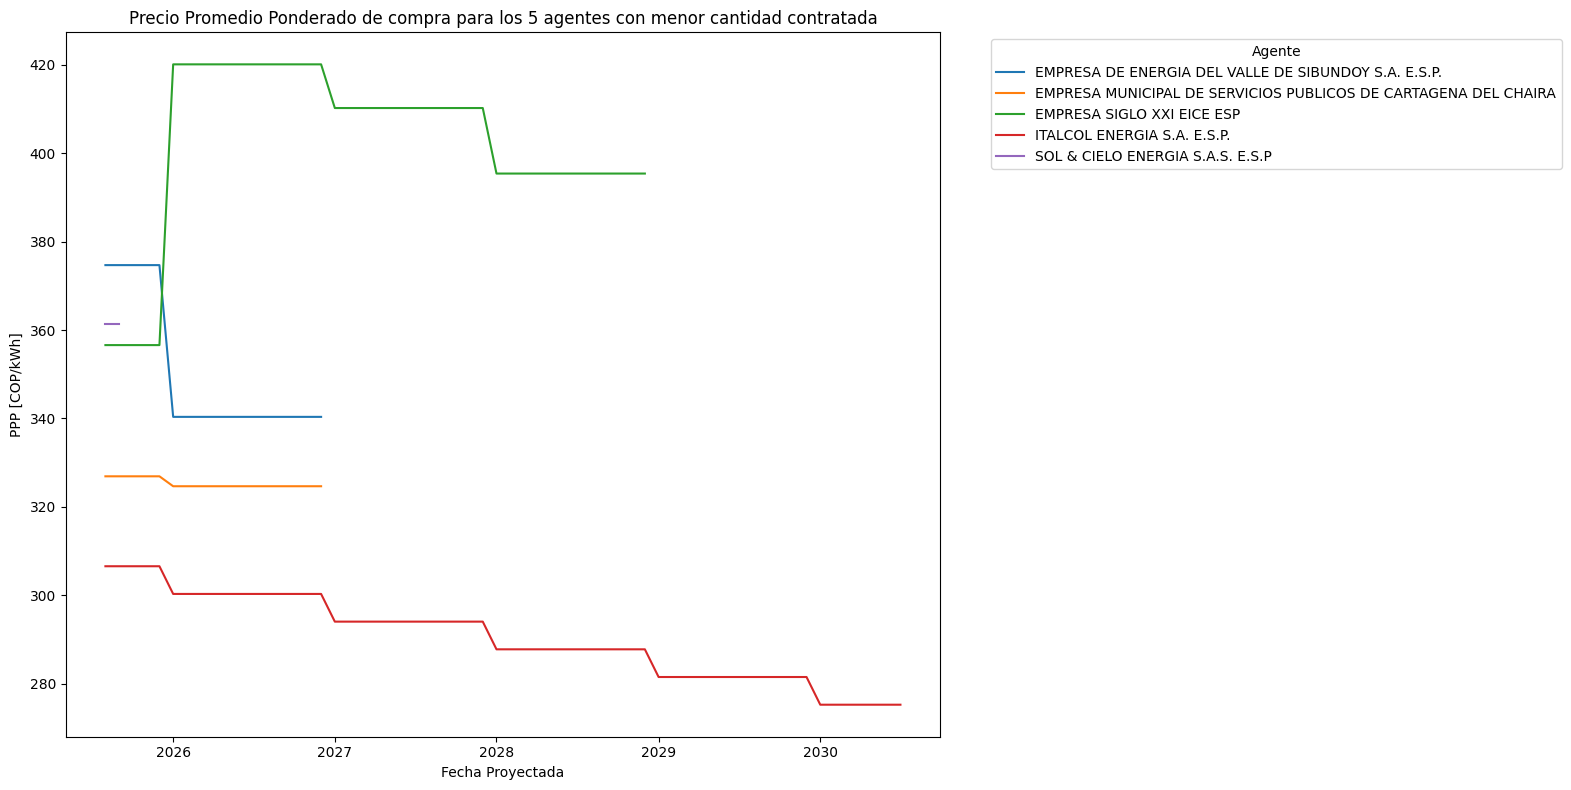

In [61]:
plt.figure(figsize=(16, 8))
sns.lineplot(
    data=df_tail,
    x='FechaProyectada',
    y='PPP',
    hue='NombreAgente',
    # marker='o'
)
plt.title(f'Precio Promedio Ponderado de compra para los {num_agentes} agentes con menor cantidad contratada')
plt.xlabel('Fecha Proyectada')
plt.ylabel('PPP [COP/kWh]')
plt.legend(title='Agente', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=1)
plt.tight_layout()
plt.show()

*Es posible observar que los agentes con menor cantidad de energía contratada lo hacen en periodos mas cortos de tiempo y la tendencia es a un precio mas alto. Caso contrario a los agentes que contratan una mayor cantidad de energia, cuya tendencia del precio es a la baja. Además, esta cantidad tiende a ser directamente proporcional a su demanda.*

### Energía contratada por mecanismo en el mercado regulado

In [62]:
df_bar = (
    df_trabajo
    .groupby(['FechaProyectada', 'Mecanismo'])['Cantidad']
    .sum()
    .reset_index()
)

df_bar.head()

,FechaProyectada,Mecanismo,Cantidad
0,2025-08-01,Antes del SICEP,5.874657e+08
1,2025-08-01,Mecanismos de Comercialización,3.990682e+06
2,2025-08-01,Por fuera del SICEP,9.661046e+07
3,2025-08-01,SICEP,2.825468e+09
4,2025-09-01,Antes del SICEP,5.670925e+08


In [63]:
# Estructura del DataFrame para facilitar la visualización
df_pivot = df_bar.pivot(index='FechaProyectada', columns='Mecanismo', values='Cantidad').fillna(0)
df_pivot.index = pd.to_datetime(df_pivot.index)
df_pivot.head()

Mecanismo,Antes del SICEP,Mecanismos de Comercialización,Por fuera del SICEP,SICEP
FechaProyectada,,,,
2025-08-01,587465693.0,3990682.0,9.661046e+07,2.825468e+09
2025-09-01,567092473.0,3861950.5,1.127929e+08,2.804495e+09
2025-10-01,571452321.0,3990682.0,1.079872e+08,2.810182e+09
2025-11-01,542035615.0,3861950.5,1.049381e+08,2.644157e+09
2025-12-01,550611747.0,3990682.0,1.075057e+08,2.695355e+09


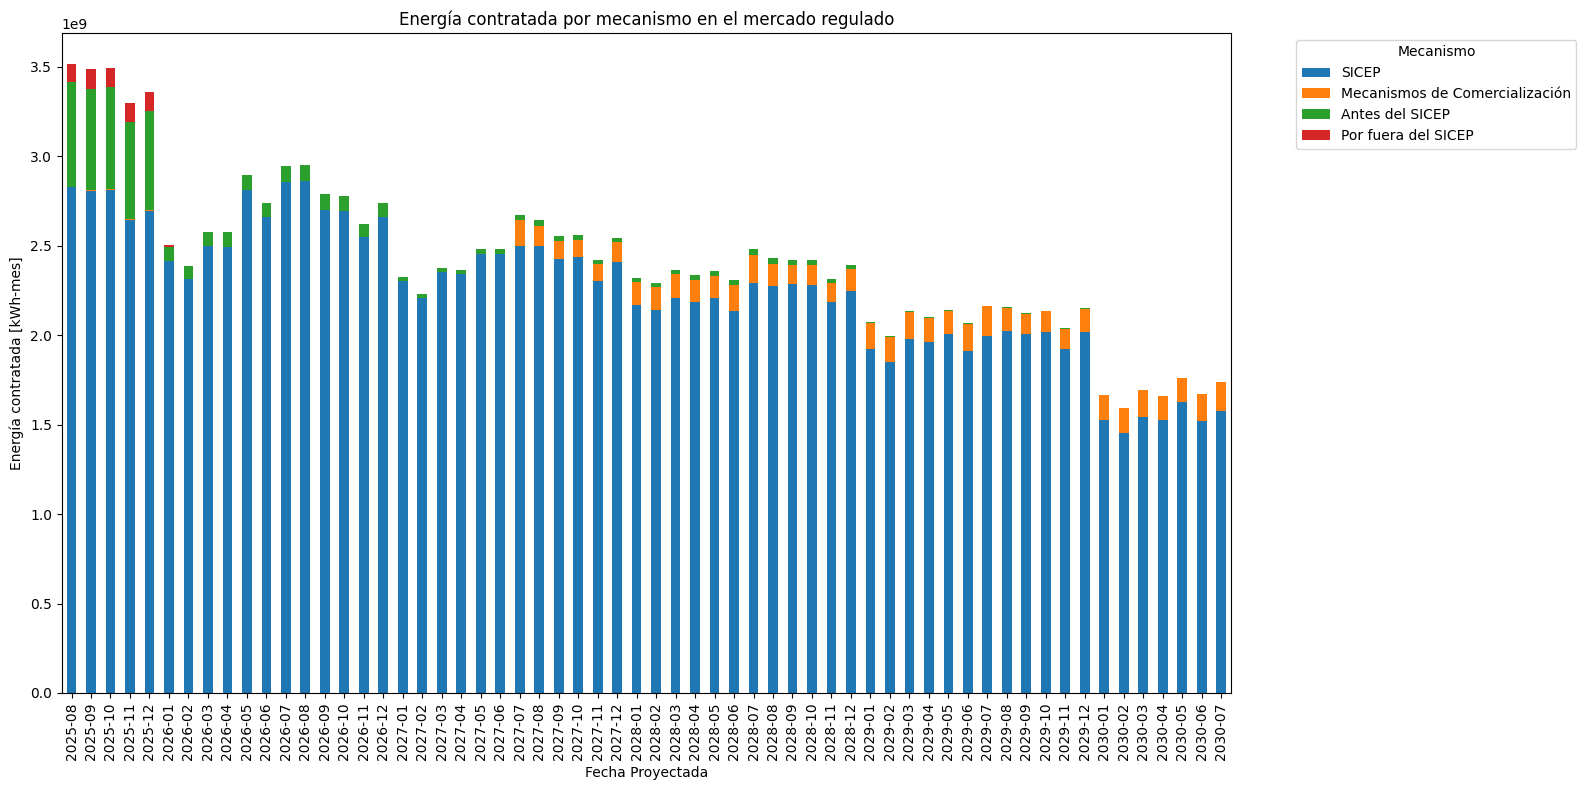

In [64]:
# Formatear el índice a "YYYY-MM"
df_pivot.index = df_pivot.index.strftime('%Y-%m')

# Ordenar mecanismos de mayor a menor cantidad total
orden_mecanismos = df_pivot.sum(axis=0).sort_values(ascending=False).index.tolist()
df_pivot = df_pivot[orden_mecanismos]

# Gráfico de barras apiladas
ax = df_pivot.plot(kind='bar', stacked=True, figsize=(16, 8))
ax.set_title('Energía contratada por mecanismo en el mercado regulado')
ax.set_xlabel('Fecha Proyectada')
ax.set_ylabel('Energía contratada [kWh-mes]')
plt.legend(title='Mecanismo', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

*Es evidente que la mayor cantidad de energía contratada a futuro en el mercado regulado se realizó a través del SICEP y los mecanismos de comercialización toman relevancia en la contratación (Ej: Derivex)*

### Segmentación de agentes

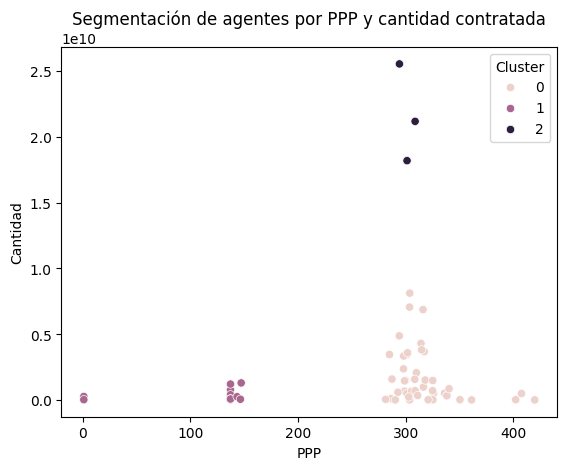

In [65]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Selecciona variables relevantes
X = df_trabajo.groupby(by=['NombreAgente','Mecanismo']).agg({'PPP':'mean', 'Cantidad':'sum'}).reset_index()
X_scaled = StandardScaler().fit_transform(X[['PPP', 'Cantidad']])

# Aplicar K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
X['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualizar los clusters
sns.scatterplot(data=X, x='PPP', y='Cantidad', hue='Cluster')
plt.title('Segmentación de agentes por PPP y cantidad contratada')
plt.show()

### Detección de outliers en agentes y contratos

La detección de outliers permite identificar agentes o contratos con comportamientos atípicos, por ejemplo, precios o cantidades fuera de lo común. Esto puede ayudar a entender riesgos, oportunidades o errores en los datos.

A continuación se muestra un ejemplo usando Isolation Forest para detectar outliers en el conjunto de agentes agrupados por mecanismo.

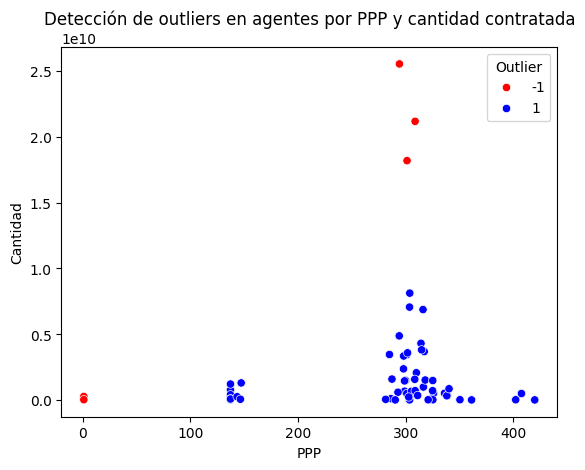

Agentes detectados como outliers: ['CARIBEMAR DE LA COSTA S.A.S. E.S.P.', 'CELSIA COLOMBIA S.A. E.S.P.', 'COMPAÑIA DE ELECTRICIDAD DE TULUA S.A. E.S.P.', 'EMPRESAS PUBLICAS DE MEDELLIN E.S.P.', 'ENEL COLOMBIA SA ESP']


In [66]:
from sklearn.ensemble import IsolationForest
import numpy as np

# Usamos el mismo DataFrame X del clustering
X_outlier = X[['PPP', 'Cantidad']].copy()
iso = IsolationForest(contamination=0.07, random_state=42)
X['Outlier'] = iso.fit_predict(X_outlier)

# Visualización: los outliers se marcan en rojo
sns.scatterplot(data=X, x='PPP', y='Cantidad', hue='Outlier', palette={1:'blue', -1:'red'})
plt.title('Detección de outliers en agentes por PPP y cantidad contratada')
plt.show()

# Mostrar agentes detectados como outliers
outliers = X[X['Outlier'] == -1]['NombreAgente'].unique()
print('Agentes detectados como outliers:', outliers.tolist())

### Predicción del mecanismo de contratación
La clasificación permite predecir una categoría o clase a partir de variables explicativas. En este contexto, puedes predecir el mecanismo de contratación (por ejemplo, SICEP, Derivex, etc.) usando variables como PPP y cantidad contratada.
A continuación se muestra un ejemplo usando un clasificador Random Forest.

In [67]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Prepara los datos
features = ['PPP', 'Cantidad']
X_class = X[features]
y_class = X['Mecanismo']

# Divide en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_class, y_class, test_size=0.3, random_state=42)

# Entrena el clasificador
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predicciones y reporte
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

                                precision    recall  f1-score   support

               Antes del SICEP       0.25      0.50      0.33         2
Mecanismos de Comercialización       1.00      1.00      1.00         5
           Por fuera del SICEP       0.50      0.50      0.50         2
                         SICEP       0.75      0.60      0.67        10

                      accuracy                           0.68        19
                     macro avg       0.62      0.65      0.62        19
                  weighted avg       0.74      0.68      0.70        19



## Ejemplo práctico: Recomendación de mecanismo y precio para compra de energía (Comercializador)

Supongamos que eres un **comercializador** y necesitas comprar 50,000 kWh de energía para el próximo mes, pero no sabes a qué precio ni por qué mecanismo contratar.

Como consultor, el proceso sería:

1. **Definir tu necesidad:**
   - Cantidad requerida: 50,000 kWh
   - Fecha de compra: próximo mes

2. **Analizar mecanismos disponibles:**
   - Revisar tendencias históricas de precio y cantidad por mecanismo.

3. **Simular escenarios y recomendar:**
   - Usar modelos de clasificación y recomendación para sugerir el mecanismo y el rango de precios óptimo.

4. **Visualizar y justificar la recomendación:**
   - Mostrar gráficamente las opciones y explicar la decisión.

A continuación se muestra el código y análisis para este caso.

In [68]:
# Parámetros del comercializador
cantidad_requerida = 50000  # kWh
fecha_objetivo = pd.to_datetime('2025-09-01')

# Filtrar histórico de mecanismos y precios para el mes objetivo
df_mes = df_trabajo[df_trabajo['FechaProyectada'] == fecha_objetivo.strftime('%Y-%m-%d')]

# Agrupar por mecanismo y calcular PPP promedio y cantidad total
resumen_mecanismos = df_mes.groupby('Mecanismo').agg({'PPP':'mean', 'Cantidad':'sum'}).reset_index()
print('Resumen histórico por mecanismo:')
print(resumen_mecanismos)

# Simular recomendación usando el modelo entrenado (Random Forest)
# Creamos un DataFrame con la necesidad del comercializador
nuevos_contratos = pd.DataFrame({
    'PPP': resumen_mecanismos['PPP'],
    'Cantidad': cantidad_requerida
})

# Usar el modelo entrenado previamente para predecir mecanismo recomendado
recomendaciones = clf.predict(nuevos_contratos[['PPP', 'Cantidad']])
nuevos_contratos['Mecanismo recomendado'] = recomendaciones

# Agrupar por mecanismo recomendado y mostrar rango de precios sugerido
agrupado = nuevos_contratos.groupby('Mecanismo recomendado').agg(precio_min=('PPP','min'), precio_max=('PPP','max'), cantidad_total=('Cantidad','sum')).reset_index()
print('Resumen de recomendaciones por mecanismo:')
print(agrupado)

Resumen histórico por mecanismo:
                        Mecanismo         PPP      Cantidad
0                 Antes del SICEP  304.183283  5.670925e+08
1  Mecanismos de Comercialización  154.715700  3.861950e+06
2             Por fuera del SICEP  350.106671  1.127929e+08
3                           SICEP  330.130039  2.804495e+09
Resumen de recomendaciones por mecanismo:
            Mecanismo recomendado  precio_min  precio_max  cantidad_total
0  Mecanismos de Comercialización  154.715700  154.715700           50000
1             Por fuera del SICEP  304.183283  350.106671          150000


C:\Users\50601\AppData\Local\Temp\ipykernel_40380\4158198487.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Mecanismo recomendado', y='cantidad_total', data=agrupado, width=0.25, palette=palette)


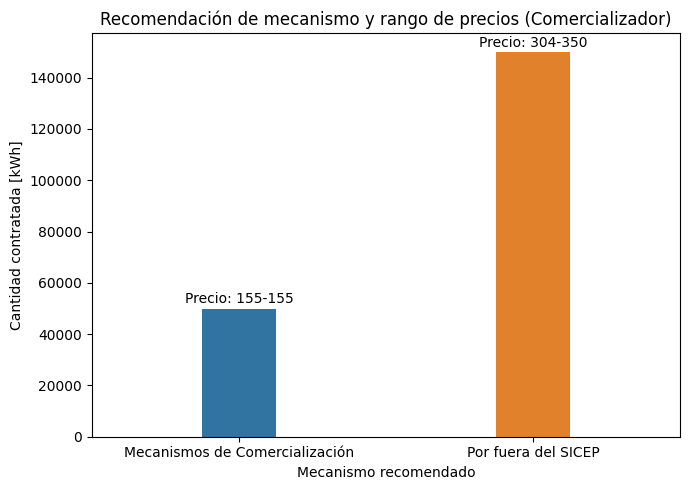

In [69]:
# Visualización de la recomendación
import matplotlib.colors as mcolors
palette = list(mcolors.TABLEAU_COLORS.values())[:len(agrupado)]
plt.figure(figsize=(7,5))
ax = sns.barplot(x='Mecanismo recomendado', y='cantidad_total', data=agrupado, width=0.25, palette=palette)
for i, row in agrupado.iterrows():
    ax.text(i, row['cantidad_total']+1000, f"Precio: {row['precio_min']:.0f}-{row['precio_max']:.0f}", ha='center', va='bottom', fontsize=10, color='black')
plt.title('Recomendación de mecanismo y rango de precios (Comercializador)')
plt.xlabel('Mecanismo recomendado')
plt.ylabel('Cantidad contratada [kWh]')
plt.tight_layout()
plt.show()